In [17]:
import keras
import cv2
import collections
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from keras.models import Sequential
from keras import datasets, layers, models
from keras.utils import to_categorical
from keras import regularizers
from keras.layers import Dense, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

### Objetivo do Código: Verificar o Menor Tamanho de Todas as Imagens em um Diretório Estruturado por Pastas

Este código tem como objetivo identificar o menor tamanho (altura em pixels) de todas as imagens contidas em um diretório principal (`MAIN_DIR`). As imagens estão organizadas em subpastas, e o processo é realizado em etapas:

1. **Configuração do Caminho Principal**:
   - Define o diretório principal onde as imagens estão localizadas.

2. **Iteração sobre as Subpastas**:
   - Itera sobre cada subpasta do diretório principal.

3. **Leitura e Armazenamento dos Tamanhos das Imagens**:
   - Para cada arquivo de imagem em uma subpasta, lê as dimensões e armazena o valor correspondente à altura (número de pixels).

4. **Determinação dos Menores Tamanhos**:
   - Calcula o menor tamanho (altura) de cada subpasta.
   - Armazena os menores tamanhos de cada subpasta em uma lista.

5. **Resultados Finais**:
   - Exibe:
     - O número total de pastas analisadas.
     - O conjunto dos menores tamanhos das imagens de cada pasta.
     - O menor tamanho entre todas as imagens do diretório principal.

Este código é útil para entender o tamanho das imagens e como será feito o redimensionamento.


In [18]:
""" Verificando o menor tamanho de todas as imagens """

MAIN_DIR = "./Nonsegmented"
main_path = Path(MAIN_DIR)

min_from_fodler = []

# Faz um loop por todas as pastas
for folder in main_path.iterdir():
    current_images = []
    if folder.is_dir():
        # Faz umm loop por todas as imagens de cada pasta
        for image_path in folder.iterdir():
            if image_path.is_file():
                # Lê a imagem e adiciona o tamanho da imagem na lista
                img = cv2.imread(str(image_path))
                current_images.append(img.shape[0]) # img.shape[0] = altura da imagem
        min_from_fodler.append(min(current_images))


print(f"Número de pastas: {len(min_from_fodler)}\n")
print(f"Cojunto dos menores tamanhos de cada pasta: {min_from_fodler}\n")
print(f"Menor tamanho de todas as imagens: {min(min_from_fodler)}\n")

Número de pastas: 12

Cojunto dos menores tamanhos de cada pasta: [49, 121, 66, 55, 54, 71, 63, 51, 73, 54, 49, 62]

Menor tamanho de todas as imagens: 49



### Objetivo do Código: Criar um Novo Diretório com Imagens Redimensionadas

Este código tem como objetivo redimensionar todas as imagens de um diretório principal (`MAIN_DIR`) para um tamanho padrão definido (`TARGET_SIZE`) e salvar as imagens processadas em um novo diretório de saída (`OUTPUT_DIR`). O processo é realizado em etapas:

1. **Definição de Variáveis de Entrada**:
   - `OUTPUT_DIR`: Diretório onde as imagens redimensionadas serão salvas.
   - `TARGET_SIZE`: Tamanho padrão para o qual todas as imagens serão redimensionadas (neste caso, 64x64 pixels).

2. **Criação do Diretório de Saída**:
   - Verifica se o diretório de saída já existe. Caso contrário, cria o diretório, incluindo quaisquer subdiretórios necessários.

3. **Iteração sobre as Subpastas e Imagens**:
   - Itera sobre cada subpasta do diretório principal.
   - Para cada subpasta:
     - Cria um subdiretório correspondente no diretório de saída.
   - Para cada imagem na subpasta:
     - Lê a imagem do arquivo.
     - Redimensiona a imagem para o tamanho definido (`TARGET_SIZE`) usando interpolação cúbica.
     - Salva a imagem redimensionada no subdiretório correspondente dentro do diretório de saída.

4. **Tratamento de Erros e Feedback**:
   - Exibe mensagens de status para cada imagem, incluindo:
     - Sucesso no redimensionamento e salvamento.
     - Falhas na leitura de imagens ou erros durante o processamento.

5. **Mensagem Final**:
   - Ao concluir o processamento, exibe uma mensagem indicando que todas as imagens foram redimensionadas com sucesso.

Este código é especialmente útil no pré-processamento de imagens para redes neurais, garantindo que todas as imagens tenham o mesmo tamanho e estejam organizadas em um formato consistente para treinamento.


In [19]:
""" Criando um novo diretório com as imagens redimensionadas """

# Definindo as variáveis de entrada
OUTPUT_DIR = "./Nonsegmented-resized"
TARGET_SIZE = (64, 64)

# Criando o diretório de saída
if not Path(OUTPUT_DIR).exists():
    Path(OUTPUT_DIR).mkdir(parents=True, exist_ok=True)


main_path = Path(MAIN_DIR)

# Loop por todas as pastas
for folder in main_path.iterdir():
    if folder.is_dir():
        # Cria a pasta de saída para as imagens redimensionadas
        output_folder = Path(OUTPUT_DIR) / folder.name
        output_folder.mkdir(parents=True, exist_ok=True)
        # Loop por todas as imagens
        for image_path in folder.iterdir():
            if image_path.is_file():
                try:
                    img = cv2.imread(str(image_path))
                    if img is not None:
                        # Redimensiona a imagem e salva no diretório de saída
                        resized_img = cv2.resize(img, dsize=TARGET_SIZE, interpolation=cv2.INTER_CUBIC)
                        output_image_path = output_folder / image_path.name
                        cv2.imwrite(str(output_image_path), resized_img)
                        print(f"Redimensioando e salvo: {output_image_path}")
                    else:
                        print(f"Falha na leitura: {image_path}")
                except Exception as e:
                    print(f"Erro de processamento {image_path}: {e}")

print("Finalizado o redimensionamento das imagens")

Redimensioando e salvo: Nonsegmented-resized/Sugar beet/2.png
Redimensioando e salvo: Nonsegmented-resized/Sugar beet/272.png
Redimensioando e salvo: Nonsegmented-resized/Sugar beet/47.png
Redimensioando e salvo: Nonsegmented-resized/Sugar beet/364.png
Redimensioando e salvo: Nonsegmented-resized/Sugar beet/409.png
Redimensioando e salvo: Nonsegmented-resized/Sugar beet/172.png
Redimensioando e salvo: Nonsegmented-resized/Sugar beet/374.png
Redimensioando e salvo: Nonsegmented-resized/Sugar beet/167.png
Redimensioando e salvo: Nonsegmented-resized/Sugar beet/380.png
Redimensioando e salvo: Nonsegmented-resized/Sugar beet/328.png
Redimensioando e salvo: Nonsegmented-resized/Sugar beet/231.png
Redimensioando e salvo: Nonsegmented-resized/Sugar beet/220.png
Redimensioando e salvo: Nonsegmented-resized/Sugar beet/51.png
Redimensioando e salvo: Nonsegmented-resized/Sugar beet/362.png
Redimensioando e salvo: Nonsegmented-resized/Sugar beet/446.png
Redimensioando e salvo: Nonsegmented-resized

### Objetivo do Código: Verificar o Menor Tamanho de Todas as Imagens Redimensionadas

Este código tem como objetivo analisar o diretório de saída (`OUTPUT_DIR`), onde as imagens foram previamente redimensionadas, e determinar o menor tamanho (altura em pixels) das imagens em cada subpasta e do conjunto geral. O processo é realizado em etapas:

1. **Configuração do Caminho Principal**:
   - Define o diretório de saída como o ponto principal de análise.

2. **Iteração sobre as Subpastas**:
   - Itera sobre cada subpasta dentro do diretório de saída.

3. **Coleta de Tamanhos das Imagens**:
   - Para cada arquivo de imagem em uma subpasta:
     - Lê a imagem e armazena a altura (número de pixels) em uma lista.
   - Determina o menor tamanho de imagem em cada subpasta e o armazena em uma lista de menores valores.

4. **Resultados Finais**:
   - Exibe:
     - O número total de subpastas analisadas.
     - O conjunto dos menores tamanhos de imagens em cada subpasta.
     - O menor tamanho de imagem em todo o diretório de saída.

Este código é útil para verificar a consistência do redimensionamento realizado anteriormente e confirmar que todas as imagens foram processadas corretamente para o tamanho desejado.


In [20]:
""" Verificando o menor tamanho de todas as imagens redimensionadas """

main_path = Path(OUTPUT_DIR)

min_from_fodler = []

# Faz um loop por todas as pastas
for folder in main_path.iterdir():
    current_images = []
    if folder.is_dir():
        # Faz umm loop por todas as imagens de cada pasta
        for image_path in folder.iterdir():
            if image_path.is_file():
                img = cv2.imread(str(image_path))
                current_images.append(img.shape[0])
        # print(current_images)
        min_from_fodler.append(min(current_images))
                

print(f"Número de pastas: {len(min_from_fodler)}\n")
print(f"Cojunto dos menores tamanhos de cada pasta: {min_from_fodler}\n")

print(f"Menor tamanho de todas as imagens: {min(min_from_fodler)}\n")

Número de pastas: 12

Cojunto dos menores tamanhos de cada pasta: [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]

Menor tamanho de todas as imagens: 64



### Objetivo do Código: Dividir as Imagens em Conjuntos de Treino e Teste

Este código organiza e divide as imagens previamente redimensionadas e salvas no diretório de saída (`OUTPUT_DIR`) em conjuntos de treino e teste, atribuindo rótulos para cada categoria de imagens com base nas subpastas. O processo é realizado em etapas:

1. **Definição do Diretório de Imagens e Rótulos**:
   - `OUTPUT_DIR`: Diretório contendo as imagens redimensionadas organizadas em subpastas.
   - `LABELS`: Dicionário que associa cada subpasta a um índice numérico, representando a categoria (rótulo) das imagens.

2. **Inicialização de Estruturas de Dados**:
   - Listas para armazenar as imagens e rótulos divididos nos conjuntos de treino (`train_images`, `train_labels`) e teste (`test_images`, `test_labels`).

3. **Iteração sobre as Subpastas**:
   - Para cada subpasta no diretório de saída:
     - Obtém o rótulo correspondente à subpasta.
     - Lê as imagens e associa cada uma ao rótulo.

4. **Conversão para Arrays NumPy**:
   - As listas de imagens e rótulos de cada subpasta são convertidas para arrays do NumPy para facilitar a manipulação e divisão.

5. **Divisão dos Conjuntos de Treino e Teste**:
   - Utiliza a função `train_test_split` para dividir as imagens e rótulos em:
     - Conjunto de treino (80% das imagens da subpasta).
     - Conjunto de teste (20% das imagens da subpasta).
   - A divisão é realizada de forma aleatória, mas reproduzível, utilizando o parâmetro `random_state=42`.

6. **Agrupamento dos Dados**:
   - Os dados divididos são adicionados às listas gerais de treino e teste.

#### Resultado Final:
- **Conjunto de treino**: Contém 80% das imagens de cada subpasta e seus respectivos rótulos.
- **Conjunto de teste**: Contém 20% das imagens de cada subpasta e seus respectivos rótulos.

Este código é essencial para preparar os dados de entrada para a rede neural, garantindo que os conjuntos de treino e teste sejam bem definidos, representativos e estratificados com base nas categorias de imagens.


In [21]:
""" Dividindo as imagens em conjuntos de treino e teste """


OUTPUT_DIR = "./Nonsegmented-resized"  # Path to your images directory

# Definindo os rótulos
LABELS = {folder.name: idx for idx, folder in enumerate(Path(OUTPUT_DIR).iterdir()) if folder.is_dir()}
train_images, test_images = [], [] 
train_labels, test_labels = [], []

# Loop por todas as pastas
for folder in Path(OUTPUT_DIR).iterdir():
    if folder.is_dir():
        # Obtem o rótulo para a pasta
        label = LABELS[folder.name]  
        folder_images = []
        folder_labels = []

        # Loop por todas as imagens
        for img_path in folder.iterdir():
            if img_path.is_file():
                try:
                    # Leitura da imagem e adição ao conjunto de imagens
                    img = cv2.imread(str(img_path))
                    if img is not None:
                        folder_images.append(img)
                        folder_labels.append(label)
                except Exception as e:
                    print(f"Failed to process image {img_path}: {e}")

        # Convertendo as listas em arrays numpy
        folder_images = np.array(folder_images)
        folder_labels = np.array(folder_labels)

        # Dividindo as imagens em conjuntos de treino e teste
        folder_train_images, folder_test_images, folder_train_labels, folder_test_labels = train_test_split(
            folder_images, folder_labels, test_size=0.2, random_state=42
        )

        # Adicionando as imagens e rótulos aos conjuntos de treino e teste
        train_images.extend(folder_train_images)
        test_images.extend(folder_test_images)
        train_labels.extend(folder_train_labels)
        test_labels.extend(folder_test_labels)

### Objetivo do Código: Organizar os Dados de Treino e Teste para Uso na Rede Neural

Este código organiza os conjuntos de treino e teste, assegurando que os dados estejam no formato adequado para treinamento e avaliação de uma rede neural. As etapas são descritas a seguir:

1. **Conversão dos Dados para Arrays NumPy**:
   - Converte as listas de imagens e rótulos em arrays NumPy para facilitar a manipulação.
   - Ajusta o formato dos rótulos (`train_labels` e `test_labels`) para serem arrays de duas dimensões, compatíveis com as operações da rede neural.

2. **Randomização dos Dados**:
   - **Dados de Treino**:
     - Gera uma permutação aleatória dos índices das imagens de treino.
     - Reordena as imagens e rótulos de treino com base na permutação gerada.
   - **Dados de Teste**:
     - Realiza o mesmo processo de randomização para os dados de teste.
   - A randomização garante que os dados sejam apresentados à rede neural em uma ordem não determinística, ajudando no aprendizado.

3. **Exibição de Estatísticas**:
   - Exibe o total de imagens (soma do número de imagens de treino e teste).
   - Exibe a quantidade de imagens nos conjuntos de treino e teste, confirmando a divisão e organização dos dados.

#### Resultado Final:
- **Imagens de Treino e Teste**:
  - Dados organizados e randomizados, prontos para serem utilizados no treinamento e avaliação do modelo.
- **Compatibilidade com Redes Neurais**:
  - Os dados agora estão no formato correto, assegurando integridade e adequação para processos de aprendizado supervisionado.

Este passo é crucial para garantir que os dados estejam bem organizados e preparados antes de serem passados para a rede neural, maximizando a eficiência e a eficácia do treinamento.


In [22]:
""" Organizando os dados de treino e teste """

# Convertendo os rótulos para o formato de array numpy
train_images = np.array(train_images)
train_labels = np.array(train_labels).reshape(-1, 1)
test_images = np.array(test_images)
test_labels = np.array(test_labels).reshape(-1, 1)

# Randomizando os dados de treino
train_indices = np.random.permutation(train_images.shape[0])
train_images = train_images[train_indices]
train_labels = train_labels[train_indices]

# Randomizando os dados de teste
test_indices = np.random.permutation(test_images.shape[0])
test_images = test_images[test_indices]
test_labels = test_labels[test_indices]

# Print results
print(f"Total de Imagens: {int(train_images.shape[0]) + (test_images.shape[0])}")
print(f"Imagens de treino: {train_images.shape[0]}, Imagens de teste: {test_images.shape[0]}")

Total de Imagens: 5544
Imagens de treino: 4430, Imagens de teste: 1114


In [23]:
""" Verificando a distribuição dos rótulos """

print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(4430, 64, 64, 3)
(4430, 1)
(1114, 64, 64, 3)
(1114, 1)


### Objetivo do Código: Conferir a Distribuição dos Rótulos nos Conjuntos de Treino e Teste

Este código verifica a distribuição dos rótulos (etiquetas) nos conjuntos de treino e teste, permitindo avaliar se os dados foram divididos de maneira balanceada entre as classes. 

#### Etapas do Processo:

1. **Contagem dos Rótulos**:
   - **Conjunto de Treino**:
     - Utiliza `collections.Counter` para contar a frequência de cada rótulo (classe) no conjunto de treino.
   - **Conjunto de Teste**:
     - Realiza a mesma contagem para o conjunto de teste.
   - As contagens ajudam a identificar possíveis desequilíbrios nos dados.

2. **Visualização da Distribuição**:
   - Exibe a distribuição dos rótulos para os conjuntos de treino e teste em formato de dicionário, onde:
     - As chaves representam os rótulos das classes.
     - Os valores indicam a quantidade de amostras pertencentes a cada classe.

#### Resultado Final:
- **Distribuição de Treino**:
  - Frequência de cada classe no conjunto de treino.
- **Distribuição de Teste**:
  - Frequência de cada classe no conjunto de teste.

#### Importância:
- Avaliar a distribuição dos rótulos é crucial para garantir que os dados estejam balanceados entre as classes, o que é fundamental para evitar viés no treinamento e na avaliação do modelo.
- Caso haja um desequilíbrio significativo, técnicas de balanceamento, como aumento de dados ou amostragem, podem ser aplicadas.

Este passo assegura que o modelo tenha uma base representativa e equilibrada para aprender durante o treinamento e ser avaliado corretamente no teste.


In [24]:
""" Confere a distribuição dos rótulos """

train_label_counts = collections.Counter(train_labels.flatten())
test_label_counts = collections.Counter(test_labels.flatten())

print(f"Distribuição de treino: {train_label_counts}")
print(f"Distribuição de teste: {test_label_counts}")

Distribuição de treino: Counter({np.int64(5): 612, np.int64(4): 570, np.int64(10): 485, np.int64(11): 460, np.int64(3): 430, np.int64(0): 370, np.int64(1): 361, np.int64(2): 268, np.int64(8): 248, np.int64(6): 219, np.int64(9): 205, np.int64(7): 202})
Distribuição de teste: Counter({np.int64(5): 154, np.int64(4): 143, np.int64(10): 122, np.int64(11): 116, np.int64(3): 108, np.int64(0): 93, np.int64(1): 91, np.int64(2): 67, np.int64(8): 62, np.int64(6): 55, np.int64(9): 52, np.int64(7): 51})


### Objetivo do Código: Normalizar Imagens e Codificar Etiquetas para Treinamento da Rede Neural

Este código prepara os dados de treino e teste para serem usados no modelo de rede neural, normalizando os valores dos pixels das imagens e convertendo os rótulos para um formato adequado. As etapas são descritas a seguir:

#### Etapas do Processo:

1. **Normalização das Imagens**:
   - Divide os valores dos pixels por 255 para escalá-los para o intervalo `[0, 1]`.
   - A normalização melhora a estabilidade numérica e acelera o processo de treinamento do modelo.

2. **Codificação One-Hot das Etiquetas**:
   - Converte os rótulos (`train_labels` e `test_labels`) para o formato one-hot encoding usando `to_categorical`.
   - O número de classes é definido como `NUM_CLASSES`, que corresponde ao número total de categorias (subpastas no diretório de saída).
   - O formato one-hot encoding é necessário para tarefas de classificação multiclasse, permitindo que o modelo entenda as etiquetas de maneira binária.

3. **Definição dos Nomes das Classes**:
   - `CLASS_NAMES`: Lista com os nomes das classes (categorias), obtidos diretamente das subpastas do diretório de saída (`OUTPUT_DIR`).

4. **Visualização das Etiquetas**:
   - Exibe os rótulos numéricos atribuídos a cada classe e os nomes correspondentes.

#### Resultado Final:
- **Imagens Normalizadas**:
  - Os valores dos pixels estão no intervalo `[0, 1]`, prontos para serem processados pela rede neural.
- **Etiquetas Codificadas**:
  - Rótulos convertidos para formato one-hot encoding, compatível com a função de perda `categorical_crossentropy`.
- **Nomes das Classes**:
  - Mapeamento claro entre os nomes das classes e seus rótulos numéricos, útil para interpretar os resultados do modelo.

Este passo é essencial para padronizar os dados de entrada e garantir que estejam no formato correto para o treinamento do modelo de rede neural.


In [25]:
""" Normalizando as imagens e codificando as etiquetas """

# Normalizando as imagens
train_images = train_images / 255
test_images = test_images / 255

# Codificação one-hot das etiquetas
NUM_CLASSES = len(min_from_fodler) # 12
train_labels = to_categorical(train_labels, NUM_CLASSES)
test_labels = to_categorical(test_labels, NUM_CLASSES)

# Nome das classes (rótulos)
CLASS_NAMES = [folder.name for folder in Path(OUTPUT_DIR).iterdir() if folder.is_dir()]

# Visualizando as etiquetas
for key, value in LABELS.items():
    print(f"{key}: {value}")
print(f"Class Names: {CLASS_NAMES}")

Sugar beet: 0
Charlock: 1
Cleavers: 2
Fat Hen: 3
Common Chickweed: 4
Loose Silky-bent: 5
Shepherd’s Purse: 6
Common wheat: 7
Black-grass: 8
Maize: 9
Scentless Mayweed: 10
Small-flowered Cranesbill: 11
Class Names: ['Sugar beet', 'Charlock', 'Cleavers', 'Fat Hen', 'Common Chickweed', 'Loose Silky-bent', 'Shepherd’s Purse', 'Common wheat', 'Black-grass', 'Maize', 'Scentless Mayweed', 'Small-flowered Cranesbill']


### Objetivo do Código: Criar um Modelo de Rede Neural Convolucional (CNN)

Este código constrói um modelo de rede neural convolucional (CNN) utilizando a API `Sequential` do Keras. A arquitetura é projetada para tarefas de classificação de imagens, com as seguintes características:

#### Estrutura do Modelo:

1. **Camada Convolucional e Normalização Inicial**:
   - **`Conv2D`**:
     - Filtros: 32.
     - Kernel: `(3, 3)`.
     - Ativação: `ReLU`.
     - Padding: `'same'` para manter o tamanho espacial da imagem.
     - Primeira camada recebe a entrada com `input_shape=(64, 64, 3)` (imagens de 64x64 pixels com 3 canais - RGB).
   - **`BatchNormalization`**:
     - Normaliza os valores de saída, acelerando o treinamento e melhorando a estabilidade.

2. **Camada Convolucional Adicional e Pooling**:
   - Repetição da convolução e normalização.
   - **`MaxPooling2D`**:
     - Reduz a dimensionalidade espacial (pooling 2x2).
   - **`Dropout`**:
     - Taxa de 0.1 para reduzir overfitting, desativando aleatoriamente 10% dos neurônios.

3. **Segunda Camada Convolucional**:
   - Expande os filtros para 64, mantendo as mesmas configurações das camadas anteriores.
   - Segue com normalização, pooling e dropout.

4. **Camada Densa e Classificação**:
   - **`Flatten`**:
     - Achata os dados 2D para uma forma 1D para entrada nas camadas densas.
   - **`Dense`**:
     - Primeira camada densa com 64 neurônios e ativação `ReLU`.
     - Segunda camada densa com `NUM_CLASSES` neurônios (número de categorias), ativação `softmax` para probabilidade na saída.
   - **`Dropout`**:
     - Aplicado após a camada densa intermediária para reduzir o overfitting.

#### Resultado Final:
- **Modelo CNN com Múltiplas Camadas**:
  - Convolução e pooling para extração de características.
  - Camadas densas para classificação final.
- **Saída**:
  - Um vetor de probabilidades com tamanho igual a `NUM_CLASSES`, representando a probabilidade de cada classe.

#### Aplicação:
Este modelo é adequado para classificação de imagens, especialmente em conjuntos de dados com múltiplas categorias. A combinação de camadas convolucionais, pooling, normalização e dropout ajuda a extrair características relevantes, evitar overfitting e garantir robustez no treinamento.


In [27]:
""" Criando um modelo sequência e adicionando camadas nele """

model = Sequential()

model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(64,64,3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.1))

model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.1))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.1))
model.add(layers.Dense(NUM_CLASSES, activation='softmax'))    # num_classes = 10

In [28]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │     1,048,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 12)             │           780 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,116,012 (4.26 MB)

 Trainable params: 1,115,500 (4.26 MB)

 Non-trainable params: 512 (2.00 KB)

In [29]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [30]:
history = model.fit(train_images, train_labels, batch_size=64, epochs=30,
                    validation_data=(test_images, test_labels))

Epoch 1/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 20s 261ms/step - accuracy: 0.4084 - loss: 1.9257 - val_accuracy: 0.0835 - val_loss: 2.9729
Epoch 2/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 21s 296ms/step - accuracy: 0.8074 - loss: 0.6687 - val_accuracy: 0.0655 - val_loss: 3.6473
Epoch 3/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 21s 296ms/step - accuracy: 0.8774 - loss: 0.4479 - val_accuracy: 0.0610 - val_loss: 3.9107
Epoch 4/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 21s 293ms/step - accuracy: 0.9388 - loss: 0.2625 - val_accuracy: 0.1185 - val_loss: 4.2518
Epoch 5/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 20s 286ms/step - accuracy: 0.9703 - loss: 0.1513 - val_accuracy: 0.1463 - val_loss: 3.8371
Epoch 6/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 20s 286ms/step - accuracy: 0.9796 - loss: 0.1231 - val_accuracy: 0.1804 - val_loss: 3.6906
Epoch 7/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 20s 287ms/step - accuracy: 0.9917 - loss: 0.0691 - val_accuracy: 0.3573 - val_loss: 2.7580
Epoch 8/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 21s 298ms/step - accuracy: 0.9940 - loss: 0.0476 - val_accu

### Objetivo do Código: Visualizar a Curva de Perda do Modelo

Este código gera um gráfico que ilustra a evolução da perda durante o treinamento e a validação do modelo ao longo das épocas. O objetivo é analisar o comportamento do modelo para identificar problemas como overfitting ou underfitting.

#### Descrição das Etapas:

1. **Configuração do Gráfico**:
   - Utiliza a biblioteca `matplotlib` para criar um gráfico com tamanho de figura `6x4`.

2. **Plotagem das Curvas**:
   - **`history.history['loss']`**:
     - Valores da perda do conjunto de treino registrados durante o treinamento.
     - Representados pela linha preta no gráfico.
   - **`history.history['val_loss']`**:
     - Valores da perda do conjunto de validação registrados durante o treinamento.
     - Representados pela linha verde no gráfico.

3. **Legendas e Rótulos**:
   - **Legenda**:
     - Identifica as curvas de perda de treino e validação.
   - **Eixos**:
     - O eixo X representa as épocas de treinamento.
     - O eixo Y representa o valor da perda.
   - **Título**:
     - Define o título do gráfico como "Curvas de perda".

#### Resultado Final:
- Um gráfico que exibe:
  - A perda do modelo no conjunto de treino e validação ao longo das épocas.
  - Permite visualizar divergências entre as duas curvas:
    - **Overfitting**: Quando a perda de validação aumenta enquanto a de treino diminui.
    - **Underfitting**: Quando ambas as curvas mostram valores de perda altos.

#### Importância:
A curva de perda é uma métrica essencial para avaliar o progresso do treinamento do modelo e identificar ajustes necessários nos hiperparâmetros, como o número de épocas, taxa de aprendizado ou arquitetura da rede.


Text(0.5, 1.0, 'Curvas de perda')

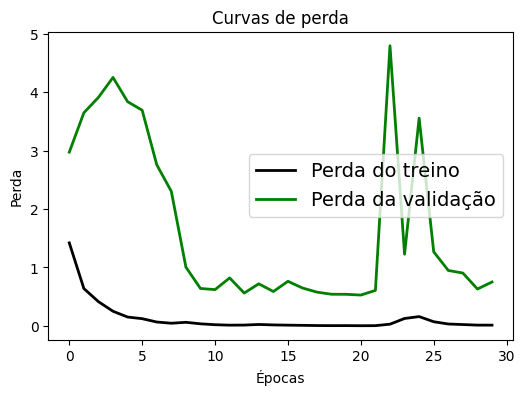

In [31]:
""" Curva de perda """

plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'black', linewidth=2.0)
plt.plot(history.history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Perda do treino', 'Perda da validação'], fontsize=14)
plt.xlabel('Épocas', fontsize=10)
plt.ylabel('Perda', fontsize=10)
plt.title('Curvas de perda', fontsize=12)

### Objetivo do Código: Visualizar a Curva de Acurácia do Modelo

Este código gera um gráfico que exibe a evolução da acurácia do modelo durante o treinamento e a validação ao longo das épocas. O objetivo é avaliar o desempenho do modelo e identificar o comportamento das métricas de acurácia.

#### Descrição das Etapas:

1. **Configuração do Gráfico**:
   - Define o tamanho da figura como `6x4` usando a biblioteca `matplotlib`.

2. **Plotagem das Curvas**:
   - **`history.history['accuracy']`**:
     - Representa os valores da acurácia no conjunto de treino durante o treinamento.
     - Exibida como uma linha preta no gráfico.
   - **`history.history['val_accuracy']`**:
     - Representa os valores da acurácia no conjunto de validação durante o treinamento.
     - Exibida como uma linha azul no gráfico.

3. **Legendas e Rótulos**:
   - **Legenda**:
     - Identifica as curvas de acurácia de treino e validação.
   - **Eixos**:
     - O eixo X representa o número de épocas de treinamento.
     - O eixo Y representa os valores de acurácia.
   - **Título**:
     - Define o título do gráfico como "Curva de acurácia".

#### Resultado Final:
- Um gráfico que mostra:
  - A acurácia do modelo no conjunto de treino e validação ao longo das épocas.
  - Permite visualizar o comportamento do modelo em termos de precisão:
    - **Overfitting**: Quando a acurácia de treino continua aumentando, mas a de validação estagna ou diminui.
    - **Underfitting**: Quando ambas as curvas apresentam acurácia baixa.

#### Importância:
A curva de acurácia é uma métrica crucial para monitorar o progresso do treinamento do modelo. Ela permite avaliar:
- A eficácia do modelo na classificação correta das imagens.
- O balanceamento entre os desempenhos no conjunto de treino e validação.
- Necessidades de ajustes nos hiperparâmetros ou na arquitetura da rede.


Text(0.5, 1.0, 'Curva de acurácia')

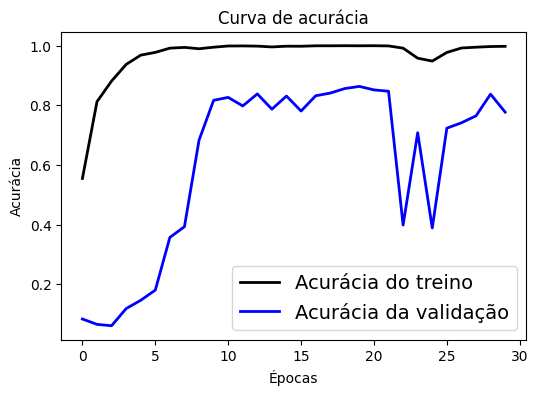

In [32]:
""" Curva de acurácia """
plt.figure(figsize=[6,4])
plt.plot(history.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Acurácia do treino', 'Acurácia da validação'], fontsize=14)
plt.xlabel('Épocas', fontsize=10)
plt.ylabel('Acurácia', fontsize=10)
plt.title('Curva de acurácia', fontsize=12)

### Objetivo do Código: Fazer Previsões com o Modelo

1. **Previsões no Conjunto de Teste**:
   - Utiliza o modelo treinado para prever os valores de saída para `test_images`.
   - Retorna probabilidades para cada classe.

2. **Conversão para Classes**:
   - Usa `np.argmax` para converter as probabilidades previstas nos índices das classes (rótulos previstos).

#### Resultado:
- **`pred`**: Matriz com probabilidades por classe.
- **`pred_classes`**: Lista com as classes previstas para cada imagem.


In [33]:
""" Previsões """

# Fazendo as previsões
pred = model.predict(test_images)
print(pred)

# Convertendo as previsões nos índices das etiquetas
pred_classes = np.argmax(pred, axis=1)
print(pred_classes)

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step
[[1.3593873e-07 7.1588016e-01 1.7228276e-05 ... 1.6371194e-04
  4.7308887e-07 4.3257275e-03]
 [9.9555838e-01 5.1639922e-04 4.6148809e-04 ... 4.8774098e-05
  1.6461376e-05 2.4409259e-05]
 [7.5407513e-08 6.9468427e-03 4.8411544e-06 ... 7.3311654e-05
  8.3213968e-07 8.4001862e-04]
 ...
 [4.8736300e-05 8.6288685e-03 9.9078101e-01 ... 6.5539911e-07
  2.9688948e-07 9.4232273e-06]
 [4.1320422e-04 2.9630235e-06 1.4709327e-06 ... 1.1294744e-05
  7.5010234e-06 1.7446434e-03]
 [1.0093988e-02 2.5152367e-05 1.9121979e-05 ... 5.2742816e-05
  6.5246404e-06 7.9857629e-05]]
[1 0 6 ... 2 5 5]


### Objetivo do Código: Comparar Classes Verdadeiras e Previstas

1. **Configuração da Visualização**:
   - Cria uma grade de 5x5 (25 imagens) usando `matplotlib`.

2. **Seleção e Exibição de Imagens**:
   - Aleatoriamente seleciona imagens do conjunto de teste.
   - Exibe a imagem junto com:
     - **Classe Verdadeira**: Obtida dos rótulos verdadeiros (`test_labels`).
     - **Classe Prevista**: Obtida das previsões do modelo (`pred_classes`).

3. **Ajustes Visuais**:
   - Remove os eixos das imagens.
   - Ajusta o espaçamento entre as imagens para melhor visualização.

#### Resultado:
- Exibição de 25 imagens do conjunto de teste com a comparação entre:
  - **Classe Correta** (verdadeira).
  - **Classe Prevista** (resultado do modelo).


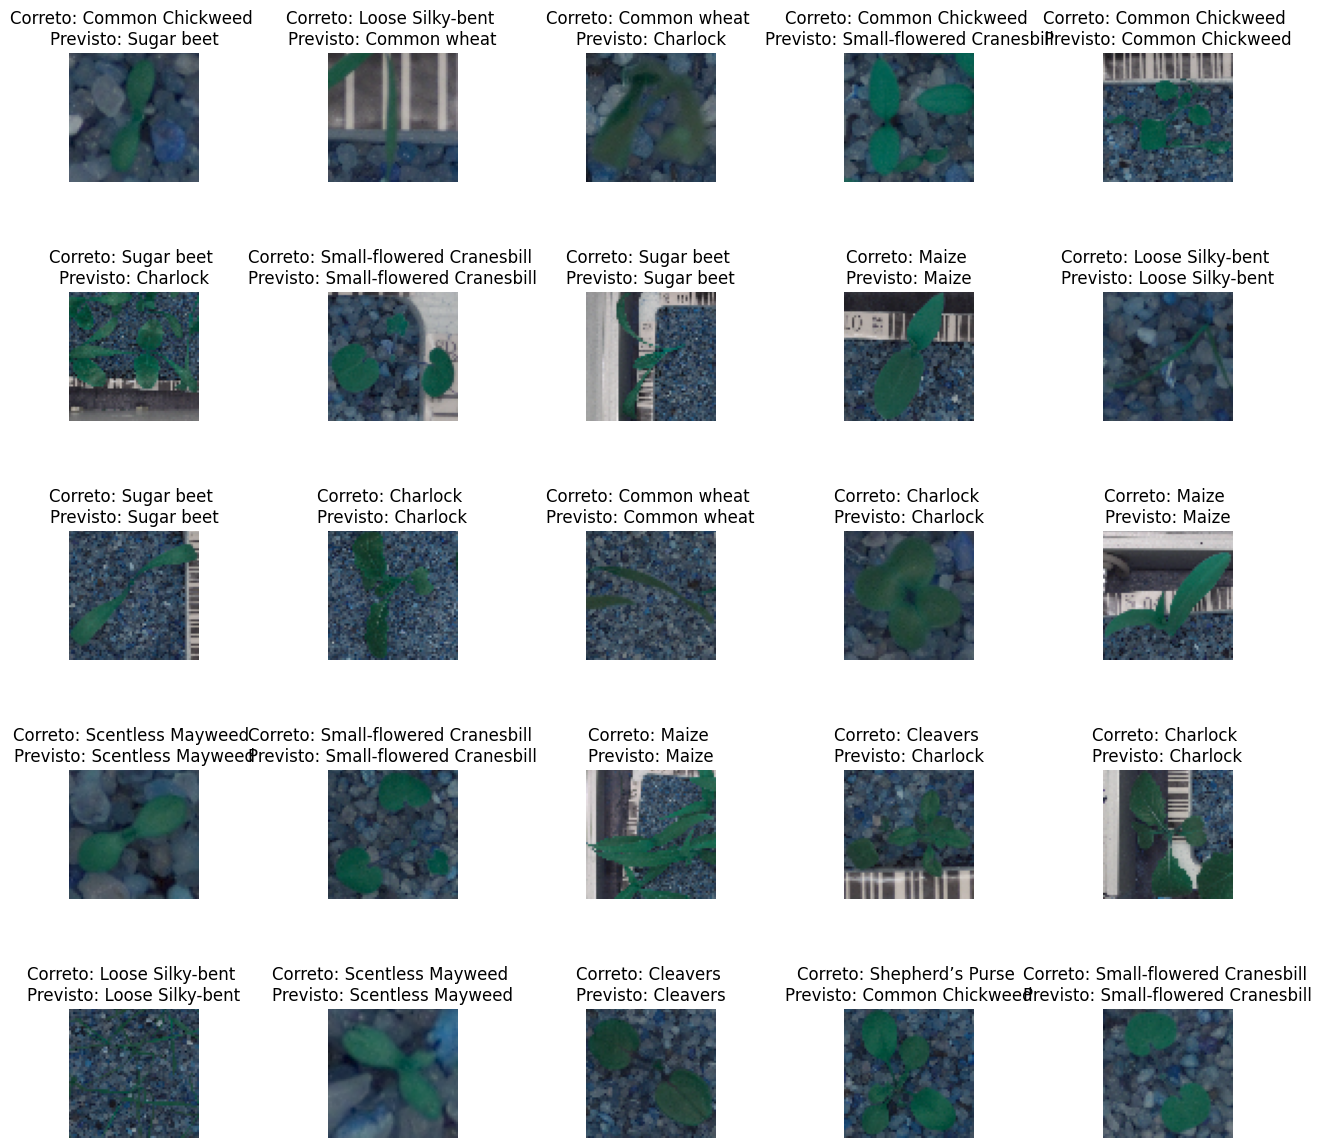

In [34]:
""" Mostrando o verdadeiro vs. Resultado previsto """

fig, axes = plt.subplots(5, 5, figsize=(15,15))
axes = axes.ravel()

for i in np.arange(0, 25):
    random_num = np.random.choice(len(test_images))
    axes[i].imshow(test_images[random_num])
    axes[i].set_title("Correto: %s \nPrevisto: %s" % (CLASS_NAMES[np.argmax(test_labels[random_num])], CLASS_NAMES[pred_classes[random_num]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

### Objetivo do Código: Visualizar a Matriz de Confusão

1. **Cálculo da Matriz de Confusão**:
   - Utiliza `confusion_matrix` para comparar as classes verdadeiras (`test_labels`) com as classes previstas (`pred_classes`).

2. **Visualização da Matriz**:
   - Plota a matriz de confusão usando `seaborn.heatmap`.
   - Cada célula representa o número de ocorrências de previsões corretas (diagonal principal) e incorretas.

3. **Configuração do Gráfico**:
   - Eixos:
     - **Eixo X**: Classes previstas.
     - **Eixo Y**: Classes verdadeiras.
   - Título: "Matriz de Confusão".
   - Colormap: "viridis" para uma paleta visualmente amigável.

#### Resultado:
- A matriz de confusão permite:
  - Identificar a precisão para cada classe.
  - Analisar padrões de erros comuns entre classes.


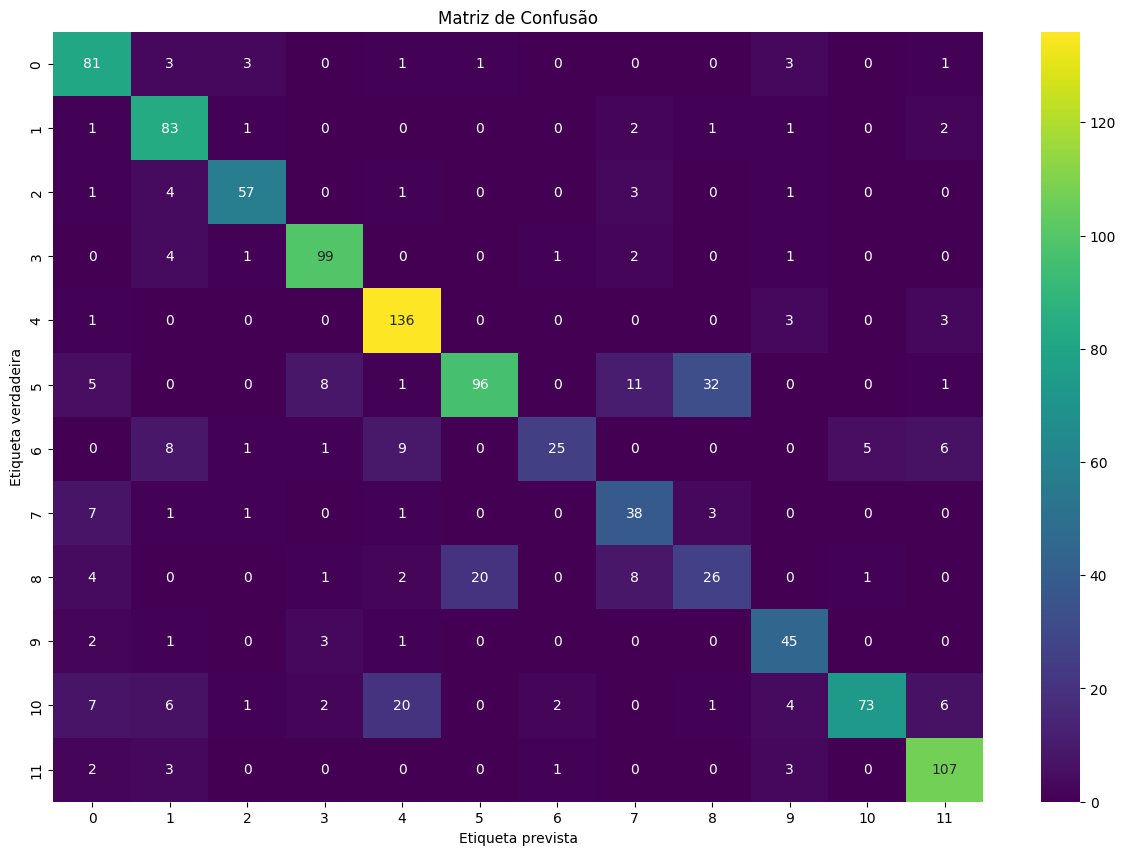

In [35]:
""" Matriz de confusão """

confusion_mtx = confusion_matrix(np.argmax(test_labels, axis=1), pred_classes)

# Plota a matriz de confusão
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(confusion_mtx, annot=True, fmt="d", ax=ax, cmap="viridis")
ax.set_xlabel("Etiqueta prevista")
ax.set_ylabel("Etiqueta verdadeira")
ax.set_title("Matriz de Confusão");